#**Big Sales Prediction using Random Forest Regressor**

##**Import Libraries**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

##**Import Data from github.com**

In [47]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [48]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [50]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [51]:
data.shape

(14204, 12)

In [52]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [53]:
data['Item_Weight'].isna().sum()

2389

In [54]:
mean = data['Item_Weight'].mean()
data['Item_Weight'].fillna(value = mean, inplace = True)

In [55]:
data['Item_Weight'].isna().sum()

0

##**Data Visualization**

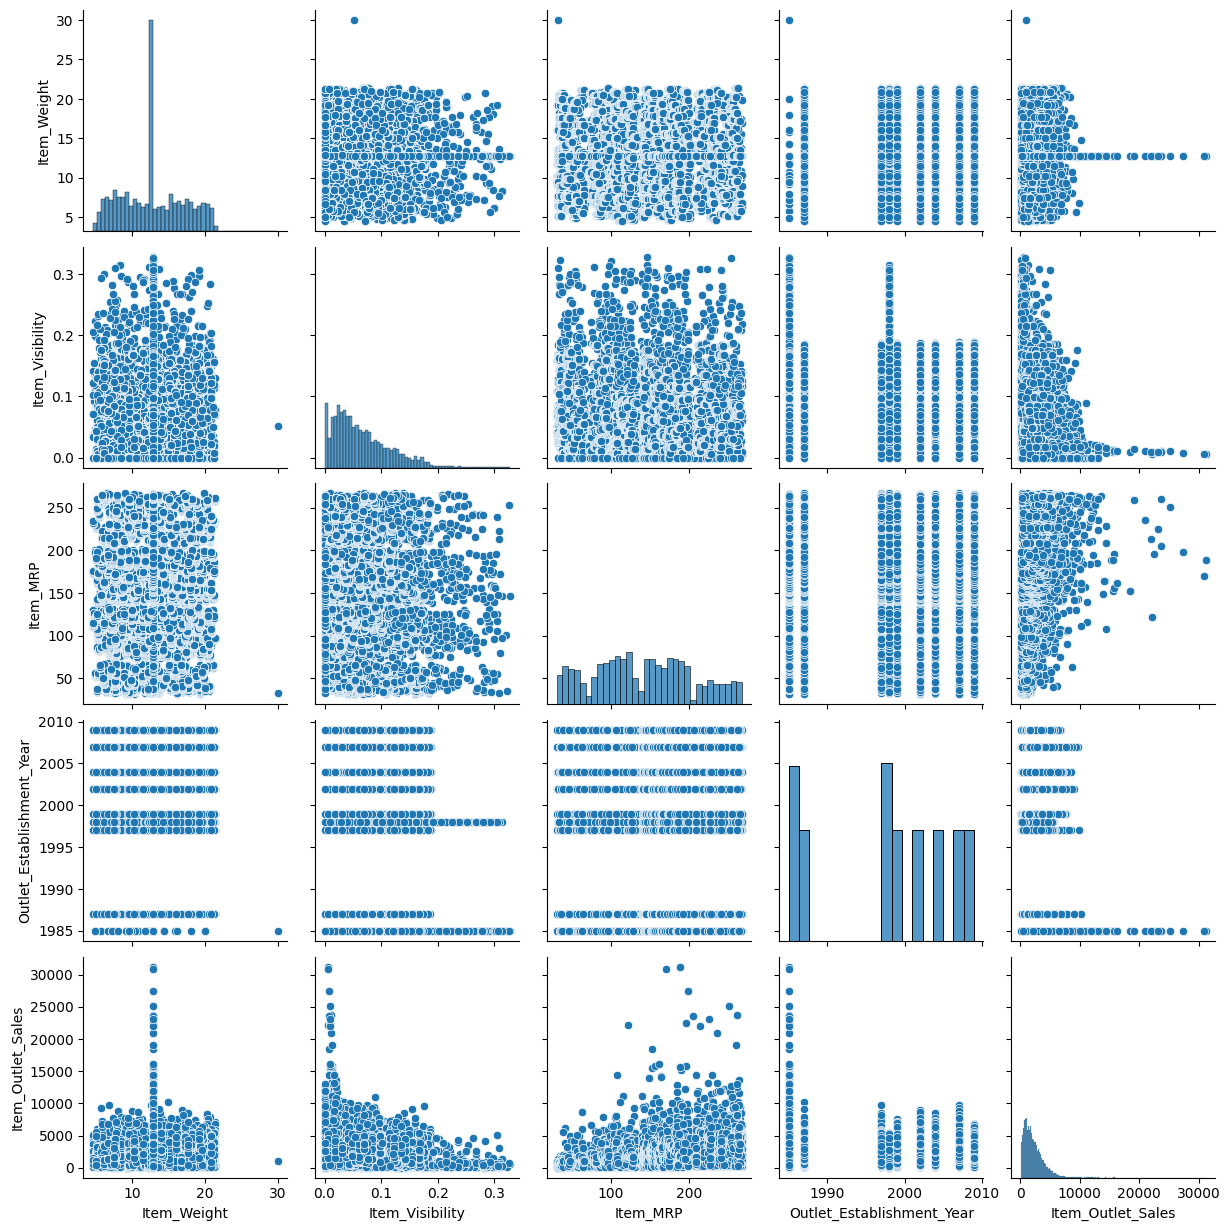

In [56]:
sns.pairplot(data) 

##**Data Preprocessing**

In [57]:
data[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [58]:
data[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [59]:
data.replace({'Item_Fat_Content': {'LF':0,'reg':1,'low fat': 0, 'Low Fat': 0 , 'Regular': 1}}, inplace=True) #Low Fat --> 0 and Regular --> 1

In [60]:
data['Item_Fat_Content'].value_counts()

0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

In [61]:
data[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

In [62]:
data.replace({'Item_Type':{'Fruits and Vegetables': 0,'Snack Foods':0,
                            'Household': 1,'Frozen Foods': 0,'Dairy': 0,
                           'Baking Goods': 0,'Canned': 0,'Health and Hygiene': 1,
                           'Meat': 0,'Soft Drinks': 0,'Breads': 0,
                           'Hard Drinks': 0,'Others': 2,
                           'Starchy Foods': 0,'Breakfast': 0,
                           'Seafood': 0}}, inplace=True)

In [63]:
data[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [64]:
data[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
dtype: int64

In [65]:
data.replace({'Outlet_Identifier':{'OUT027': 0,'OUT013': 1,'OUT035': 2,'OUT046': 3,'OUT049': 4,'OUT045': 5,'OUT018': 6, 'OUT017': 7,'OUT010': 8,'OUT019': 9}}, inplace=True)

In [66]:
data[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [67]:
data[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
dtype: int64

In [68]:
data.replace({'Outlet_Size': {'Small': 0,'Medium': 1,'High': 2}}, inplace=True)

In [69]:
data[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
dtype: int64

In [70]:
data.replace({'Outlet_Location_Type': {'Tier 1': 0,'Tier 2': 1,'Tier 3': 2}}, inplace=True)

In [71]:
data[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [72]:
data.replace({'Outlet_Type': {'Supermarket Type1': 0,'Grocery Store': 1,'Supermarket Type3': 2,'Supermarket Type2': 3}}, inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [74]:
data['Item_Identifier'].value_counts()

FDT36    10
FDG09    10
FDZ56    10
FDT19    10
FDD56    10
         ..
NCW54     7
FDS22     7
FDM50     7
FDX49     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64

##**Define variables X and Y**

In [75]:
X = data.drop(['Item_Outlet_Sales','Item_Identifier'],axis =1 )
y = data['Item_Outlet_Sales']


##**Split the Data**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

##**Fit the data into model**

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor()

In [81]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
y_predict = model.predict(X_test)

##**Prediction**

In [83]:
y_predict

array([1590.79833149,  564.65687337, 4216.07581896, ..., 1455.48222264,
       3912.36560664, 2643.11131494])

## **Model Performance metrices**

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, confusion_matrix

In [85]:
mean_squared_error(y_test, y_predict)

1406821.6279260004

In [86]:
mean_absolute_error(y_test, y_predict)

805.8530417688502

In [87]:
mean_absolute_percentage_error(y_test, y_predict)

0.7024421700432802

In [88]:
r2_score(y_test, y_predict)

0.5751780300733067

##**Result**

**So, this model is predicting with the accuracy of 74.49%**